<a href="https://colab.research.google.com/github/Sam-Huin/atom/blob/master/Capstone_BTC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install scrapy
#!pip install hvplot
#!pip install -U bokeh

In [37]:
#libraries import
#import holoviews as hv
#hv.extension('bokeh')
#import hvplot.pandas
import pandas as pd, numpy as np
import requests
import time
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import io
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, LSTM
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
#from sklearn.model_selection import train_test_split
from bs4 import BeautifulSoup
from scrapy.selector import Selector
#from scrapy.http import HtmlResponse
from sklearn.metrics import mean_absolute_error
%matplotlib inline

Using TensorFlow backend.


In [0]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
#pd.options.plotting.backend = 'hvplot'

In [10]:
#url = 'https://raw.git.generalassemb.ly/samuel-huin/classes/master/A%20CapstonE/datasets/bitcoin_3hrs?token=AABctR3oHvC84GCBK0-gRJOSlOdZxgPNks5eEOY5wA%3D%3D'
#pd_btc = pd.read_csv(url)    #getting dataset from GitHub URL
#pd_btc = pd.read_csv('./datasets/bitcoin_3hrs')    #getting csv from local machine

from google.colab import files
uploaded = files.upload()

Saving bitcoin_3hrs.csv to bitcoin_3hrs.csv


In [0]:
# Dataset is now stored in a Pandas Dataframe
pd_btc = pd.read_csv(io.BytesIO(uploaded['bitcoin_3hrs.csv']))

In [0]:
pd_btc['Date_Time'] = pd.to_datetime(pd_btc['Date_Time'])
pd_btc.set_index('Date_Time', inplace=True)
pd_btc.sort_index(inplace=True)

In [164]:
pd_btc.dtypes

Open      float64
Close     float64
High      float64
Low       float64
Volume    float64
dtype: object

In [165]:
pd_btc.head()

,Open,Close,High,Low,Volume
Date_Time,,,,,
2017-01-01 00:00:00,966.61,965.00,967.79,965.00,226.067256
2017-01-01 03:00:00,965.01,964.88,965.20,961.26,228.311999
2017-01-01 06:00:00,963.90,965.46,967.45,962.60,282.771187
2017-01-01 09:00:00,965.41,978.16,978.89,965.37,1806.444917
2017-01-01 12:00:00,977.11,978.45,978.59,970.85,490.728218


In [0]:
pd_btc['High_Low'] = pd_btc['High'] - pd_btc['Low']
pd_btc['High_Open'] = pd_btc['High'] - pd_btc['Open']
pd_btc['Low_Open'] = pd_btc['Open'] - pd_btc['Low']

In [0]:
def count_tr(df):
    list_num = []
    for i in range(len(df)):
        if df.iloc[i]['High'] > df.iloc[i]['Open']:
          list_num.append(df.iloc[i]['High_Open'] + df.iloc[i]['Low_Open'])                           
        else:
          list_num.append(df.iloc[i]['High_Low'])
    return list_num

In [0]:
def bull_bear(df):
  list_bullbear = []
  for i in range(len(df)):
    if df.iloc[i]['Close'] > df.iloc[i]['Open']:
      list_bullbear.append('Bull')
    else:
      list_bullbear.append('Bear')
  return list_bullbear      

In [0]:
pd_btc['TR'] = count_tr(pd_btc)
#pd_btc['Bull_Bear'] = bull_bear(pd_btc)

In [168]:
pd_btc.head(20)

,Open,Close,High,Low,Volume,High_Low,High_Open,Low_Open,TR
Date_Time,,,,,,,,,
2017-01-01 00:00:00,966.61,965.00,967.79,965.00,226.067256,2.79,1.18,1.61,2.79
2017-01-01 03:00:00,965.01,964.88,965.20,961.26,228.311999,3.94,0.19,3.75,3.94
2017-01-01 06:00:00,963.90,965.46,967.45,962.60,282.771187,4.85,3.55,1.30,4.85
2017-01-01 09:00:00,965.41,978.16,978.89,965.37,1806.444917,13.52,13.48,0.04,13.52
2017-01-01 12:00:00,977.11,978.45,978.59,970.85,490.728218,7.74,1.48,6.26,7.74
2017-01-01 15:00:00,978.50,994.31,999.00,976.24,6258.074560,22.76,20.50,2.26,22.76
2017-01-01 18:00:00,993.75,1004.00,1005.00,993.68,2339.555718,11.32,11.25,0.07,11.32
2017-01-01 21:00:00,1004.80,998.99,1006.50,991.50,1809.195121,15.00,1.70,13.30,15.00
2017-01-02 00:00:00,999.00,1011.50,1011.50,997.30,1082.202504,14.20,12.50,1.70,14.20


In [20]:
pd_btc['Bull_Bear'].value_counts()

Bull    4271
Bear    3930
Name: Bull_Bear, dtype: int64

In [0]:
def plot_graph(line1, line2, label1=None, label2=None, title=None, lw=2):
    fig, ax = plt.subplots(1, figsize=(18, 7))
    #ax.xaxis_date()
    #ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%Y'))
    ax.plot(line1, label=label1, linewidth=lw)
    ax.plot(line2, label=label2, linewidth=lw)
    ax.set_ylabel('USD($)', fontsize=14)
    ax.set_title(title, fontsize=16)
    ax.legend(loc='upper left', fontsize=16);

In [0]:
def plot_graph_2(line1, line2, line3, line4, label1, label2, label3, label4, title, lw=2):
    fig, ax1 = plt.subplots(1, figsize=(18, 7))
    #ax.xaxis_date()
    #ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    ax1.plot(line1, label=label1, linewidth=lw, color='blue')
    ax1.plot(line2, label=label2, linewidth=lw, color='orange')
    ax1.set_ylabel('USD($)', fontsize=14, color='blue')
    ax1.set_title(title, fontsize=16)
    
    ax2 = ax1.twinx()
    ax2.plot(line3, label=label3, linewidth=lw, color='green')
    ax2.plot(line4, label=label4, linewidth=lw, color='orange')
    ax2.set_ylabel('Volume', fontsize=14, color='green')
   
    ax1.legend(loc='upper left', fontsize=16);
    ax2.legend(loc='upper right', fontsize=16);

In [0]:
def train_test_split(df, test_size=0.2, shuffle=False):
  split = len(pd_btc) - int(len(pd_btc)*0.2)
  train_set = pd_btc[:split]
  test_set = pd_btc[split-1:]
  return train_set, test_set

In [104]:
train_set, test_set = train_test_split(pd_btc, test_size=0.2, shuffle=False)
print(pd_btc.shape)
print(train_set.shape)
print(test_set.shape)

(8201, 5)
(6561, 5)
(1641, 5)


In [105]:
train_set.tail()

,Open,Close,High,Low,Volume
Date_Time,,,,,
2019-03-31 12:00:00,4178.900000,4168.700000,4178.900000,4163.700000,211.198491
2019-03-31 15:00:00,4168.700000,4165.700000,4174.900000,4162.000000,305.724705
2019-03-31 18:00:00,4165.700000,4170.791018,4174.400000,4164.200000,273.014414
2019-03-31 21:00:00,4170.791018,4167.500000,4170.791018,4161.320217,251.024155
2019-04-01 00:00:00,4167.500000,4192.000000,4198.900000,4124.000000,1523.453814


In [106]:
test_set.head()

,Open,Close,High,Low,Volume
Date_Time,,,,,
2019-04-01 00:00:00,4167.5,4192.000000,4198.9,4124.00000,1523.453814
2019-04-01 03:00:00,4192.7,4195.900000,4205.0,4190.10000,646.246487
2019-04-01 06:00:00,4196.0,4191.010903,4207.5,4172.03069,991.766788
2019-04-01 09:00:00,4191.1,4187.200000,4200.1,4172.00000,719.101585
2019-04-01 12:00:00,4187.2,4198.400000,4224.6,4183.80000,1462.002827


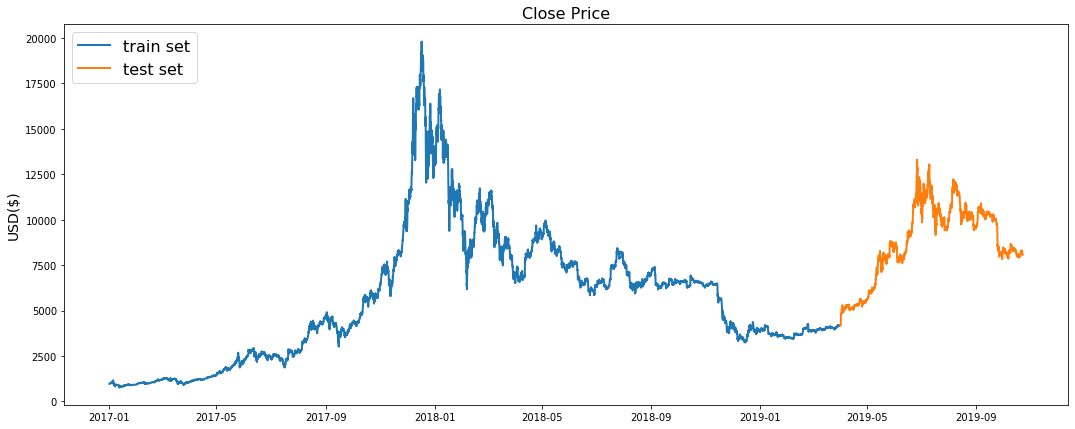

In [107]:
plot_graph(train_set['Close'], test_set['Close'], 'train set', 'test set', title='Close Price')

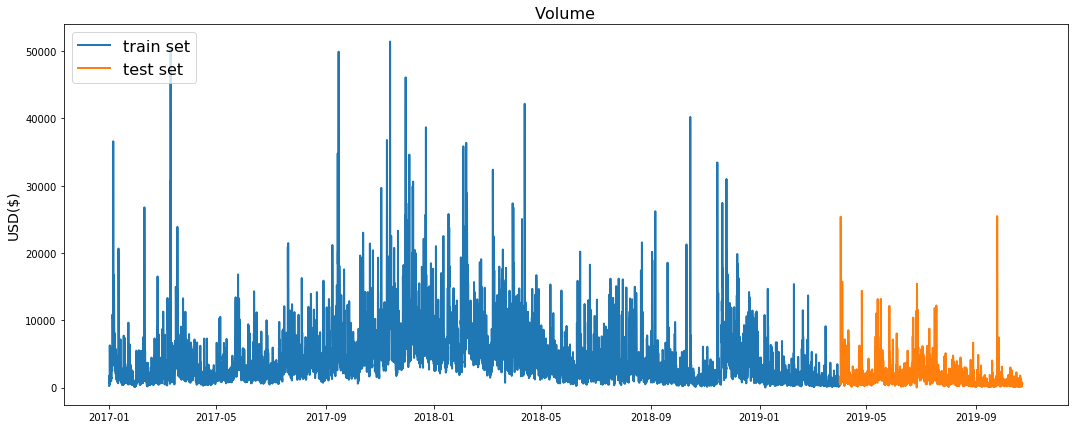

In [108]:
plot_graph(train_set['Volume'], test_set['Volume'], 'train set', 'test set', title='Volume')

In [0]:
plot_graph(train_set['TR'], test_set['TR'], 'train set', 'test set', title='TR')

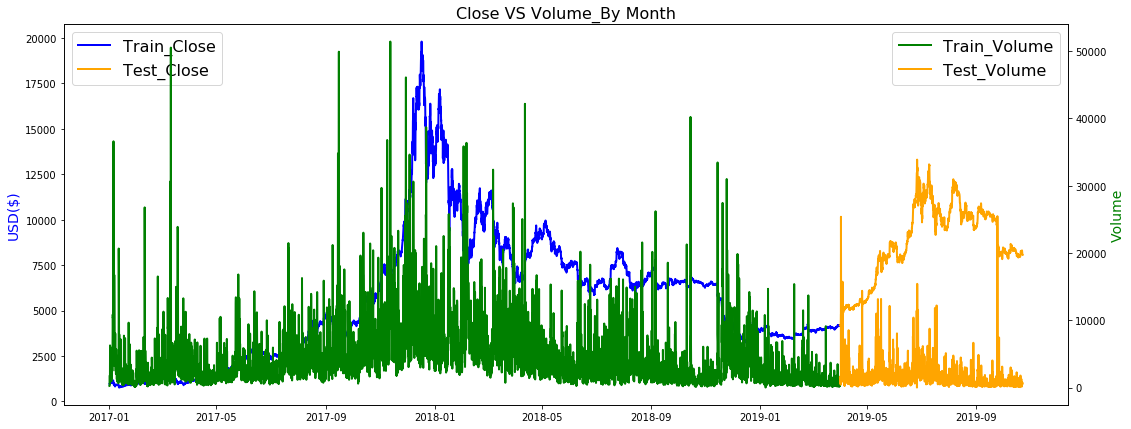

In [110]:
plot_graph_2(train_set['Close'],test_set['Close'],train_set['Volume'],test_set['Volume'],'Train_Close','Test_Close','Train_Volume','Test_Volume',title='Close VS Volume_By Month')

In [0]:
#normalizing to change the values of numeric columns in the dataset to a common scale
def normalise_zero_base(df):
    return df / df.iloc[0] - 1
  
def normalise_min_max(df):
    return (df - df.min()) / (df.max() - df.min()) 

In [0]:
def extract_window_data(df, window_len=5, zero_base=True):
    window_data = []
    for idx in range(len(df) - window_len):
        tmp = df[idx: (idx + window_len)].copy()
        if zero_base:
            tmp = normalise_zero_base(tmp)
        else:
            tmp = normalise_min_max(tmp)
        window_data.append(tmp.values)
    return np.array(window_data)

In [0]:
#prepare data to be enter into the neural network
def prepare_data(df,col,window_len=10,zero_base=True,test_size=0.2):
  train_data, test_data = train_test_split(df, test_size=test_size, shuffle=False)
  X_train = extract_window_data(train_data, window_len, zero_base=False)
  X_test = extract_window_data(test_data, window_len, zero_base=False)
  y_train = train_data[col][window_len:].values
  y_test = test_data[col][window_len:].values
  if zero_base:
    y_train = y_train / train_data[col][:-window_len].values - 1
    y_test = y_test / test_data[col][:-window_len].values - 1

  return train_data, test_data, X_train, X_test, y_train, y_test

In [0]:
def build_lstm_model(input_data, output_size, neurons=100, activ_func='linear', dropout=0.2, loss='mse', optimizer='adam'):
  model = Sequential()
  model.add(LSTM(neurons, input_shape=(input_data.shape[1], input_data.shape[2])))
  model.add(Dropout(dropout))
  model.add(Dense(units=output_size))
  model.add(Activation(activ_func))
  model.compile(loss=loss, optimizer=optimizer)
  return model

In [0]:
np.random.seed(42)
window_len = 5
test_size = 0.2
zero_base = True
lstm_neurons = 100
epochs = 20
batch_size = 32
loss = 'mse'
dropout = 0.2
optimizer = 'adam'

In [0]:
train, test, X_train, X_test, y_train, y_test = prepare_data(
    pd_btc, 'Close', window_len=window_len, zero_base=zero_base, test_size=test_size)

In [195]:
model = build_lstm_model(
    X_train, output_size=1, neurons=lstm_neurons, dropout=dropout, loss=loss,
    optimizer=optimizer)
history = model.fit(
    X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1, shuffle=True)

Epoch 1/20
6556/6556 [==============================] - 4s 572us/step - loss: 0.0015
Epoch 2/20
6556/6556 [==============================] - 2s 266us/step - loss: 8.5484e-04
Epoch 3/20
6556/6556 [==============================] - 2s 264us/step - loss: 8.0611e-04
Epoch 4/20
6556/6556 [==============================] - 2s 256us/step - loss: 7.5138e-04
Epoch 5/20
6556/6556 [==============================] - 2s 257us/step - loss: 7.3538e-04
Epoch 6/20
6556/6556 [==============================] - 2s 257us/step - loss: 7.0524e-04
Epoch 7/20
6556/6556 [==============================] - 2s 257us/step - loss: 6.9687e-04
Epoch 8/20
6556/6556 [==============================] - 2s 249us/step - loss: 6.8341e-04
Epoch 9/20
6556/6556 [==============================] - 2s 251us/step - loss: 6.8395e-04
Epoch 10/20
6556/6556 [==============================] - 2s 251us/step - loss: 6.7782e-04
Epoch 11/20
6556/6556 [==============================] - 2s 261us/step - loss: 6.6780e-04
Epoch 12/20
6556/6556 [

In [196]:
targets = test['Close'][window_len:]
preds = model.predict(X_test).squeeze()
mean_absolute_error(preds, y_test)

0.016426039429763086

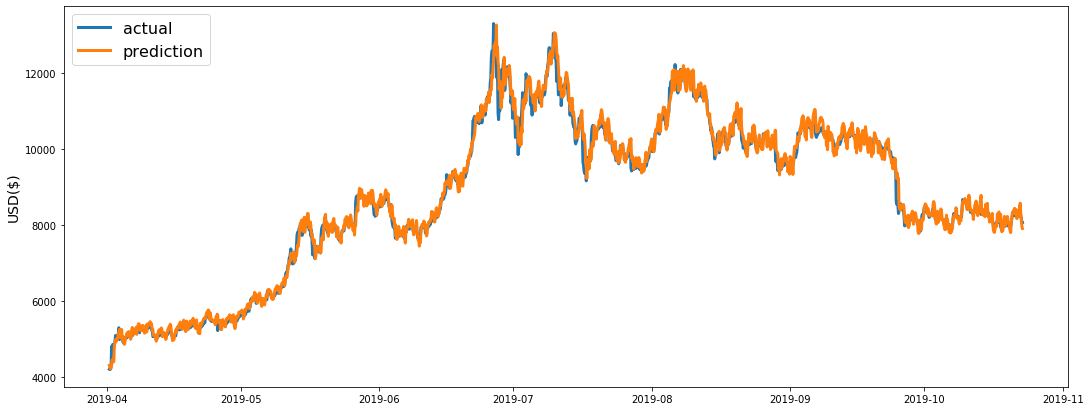

In [197]:
preds = test['Close'].values[:-window_len] * (preds + 1)
preds = pd.Series(index=targets.index, data=preds)
plot_graph(targets, preds, 'actual', 'prediction', lw=3)

In [198]:
train.shape

(6561, 9)

In [199]:
preds


Date_Time
2019-04-01 15:00:00    4297.271141
2019-04-01 18:00:00    4257.305357
2019-04-01 21:00:00    4208.709996
2019-04-02 00:00:00    4276.963707
2019-04-02 03:00:00    4300.186304
                          ...     
2019-10-22 12:00:00    8569.492979
2019-10-22 15:00:00    8316.594052
2019-10-22 18:00:00    8122.114876
2019-10-22 21:00:00    7960.925329
2019-10-23 00:00:00    7904.512262
Length: 1636, dtype: float64

In [200]:
targets

Date_Time
2019-04-01 15:00:00    4198.964020
2019-04-01 18:00:00    4190.400000
2019-04-01 21:00:00    4196.804213
2019-04-02 00:00:00    4233.800000
2019-04-02 03:00:00    4800.300000
                          ...     
2019-10-22 12:00:00    8236.000000
2019-10-22 15:00:00    8229.400000
2019-10-22 18:00:00    8159.000000
2019-10-22 21:00:00    8054.300000
2019-10-23 00:00:00    8058.809701
Name: Close, Length: 1636, dtype: float64